# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install scikit-learn-extra

In [3]:
data = pd.read_excel("hearrtss.xlsx")

# take a look at the dataset
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,70,M,TA,137,155,1,Normal,181,Y,0.20,Flat,1
3,56,F,ASY,164,334,0,Normal,198,N,2.30,Up,1
4,78,M,ATA,148,195,0,ST,107,Y,4.20,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
1214,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
1215,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
1216,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


In [4]:
data.shape

(1218, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1218 non-null   int64  
 1   Sex             1218 non-null   object 
 2   ChestPainType   1218 non-null   object 
 3   RestingBP       1218 non-null   int64  
 4   Cholesterol     1218 non-null   int64  
 5   FastingBS       1218 non-null   int64  
 6   RestingECG      1218 non-null   object 
 7   MaxHR           1218 non-null   int64  
 8   ExerciseAngina  1218 non-null   object 
 9   Oldpeak         1218 non-null   float64
 10  ST_Slope        1218 non-null   object 
 11  HeartDisease    1218 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 114.3+ KB


<Axes: >

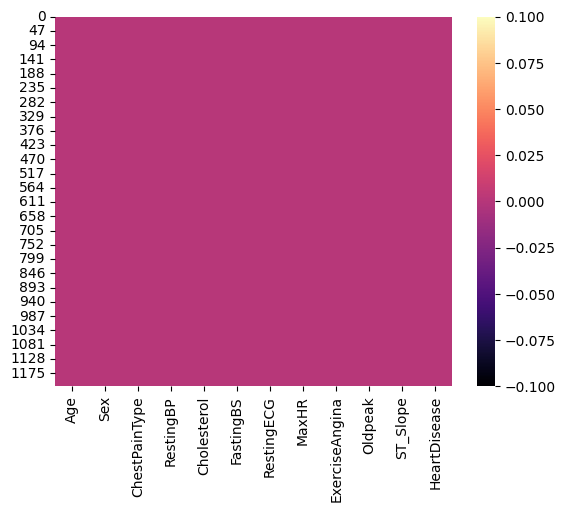

In [7]:
sns.heatmap(data.isnull(), cmap= 'magma', cbar ='False')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1218.00,53.47,10.81,28.00,46.00,54.00,61.00,79.00
RestingBP,1218.00,134.14,19.78,0.00,120.00,130.50,146.00,200.00
Cholesterol,1218.00,211.05,101.78,0.00,181.25,226.50,275.00,603.00
FastingBS,1218.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
MaxHR,1218.00,139.75,26.82,60.00,120.00,140.00,160.00,202.00
Oldpeak,1218.00,1.27,1.36,-2.60,0.00,1.00,2.00,6.20
HeartDisease,1218.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


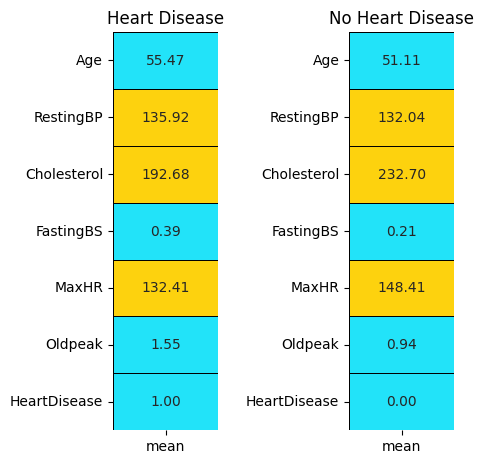

In [9]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#22e3f9','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [10]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


# CATEGORICAL

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

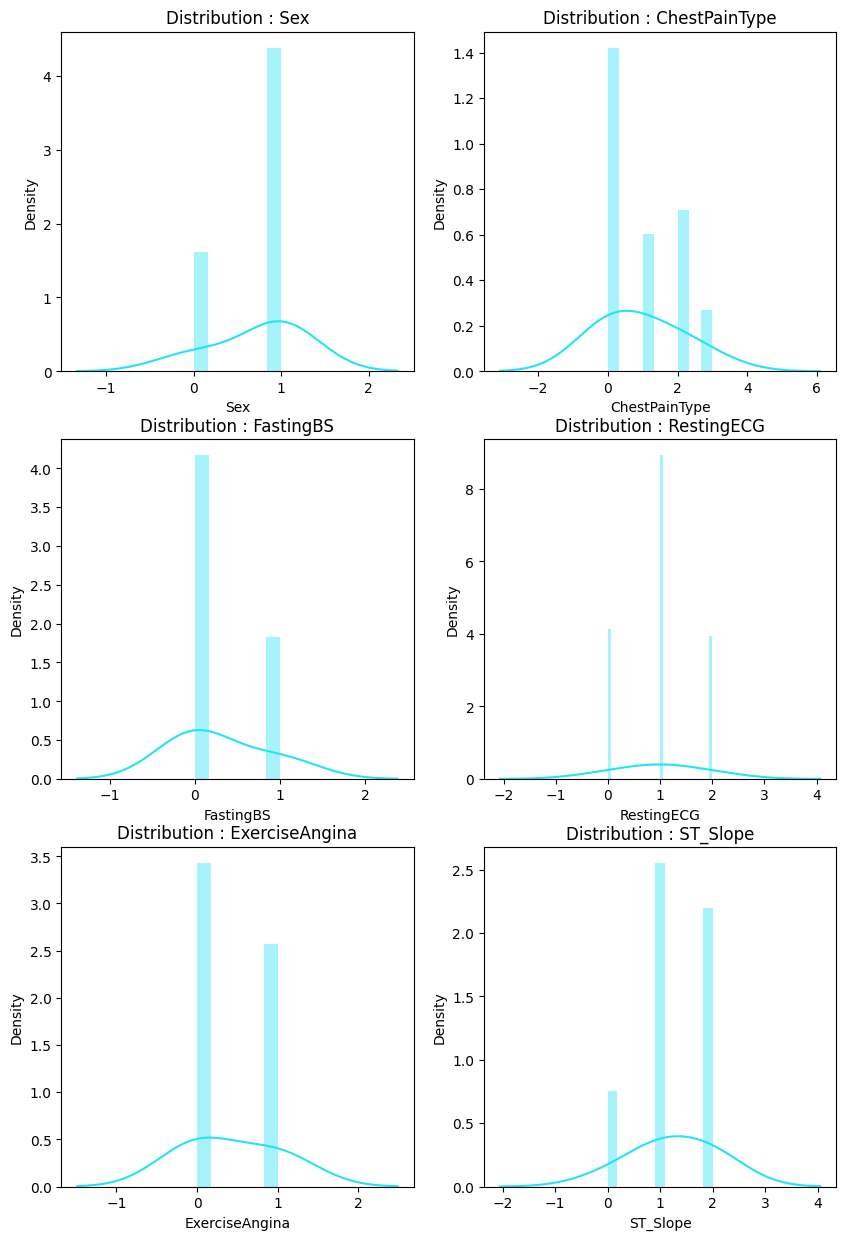

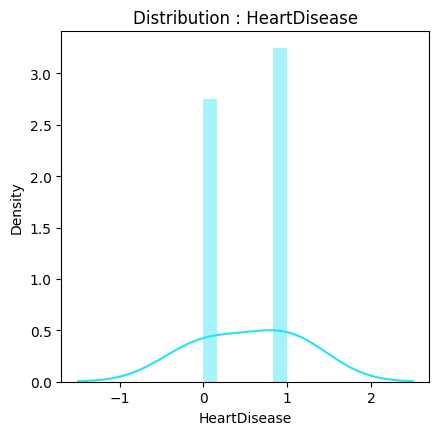

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

# NUMERICAL

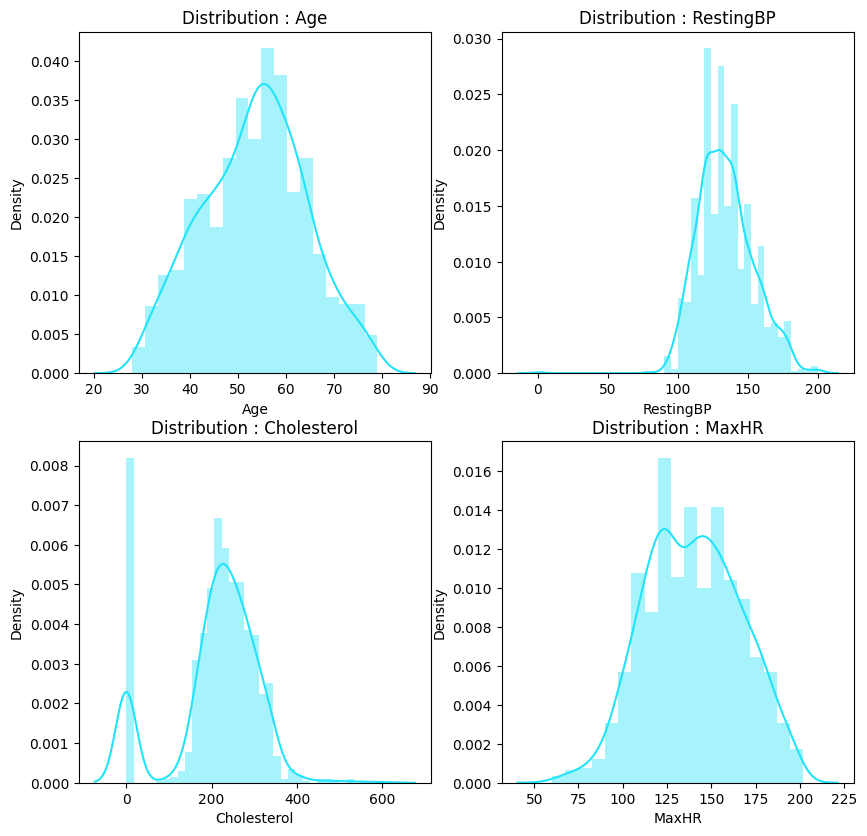

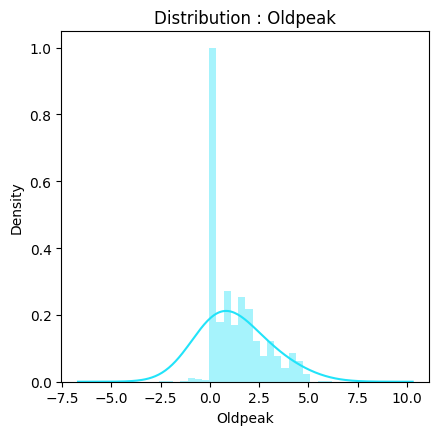

In [13]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

# vizualitation 1

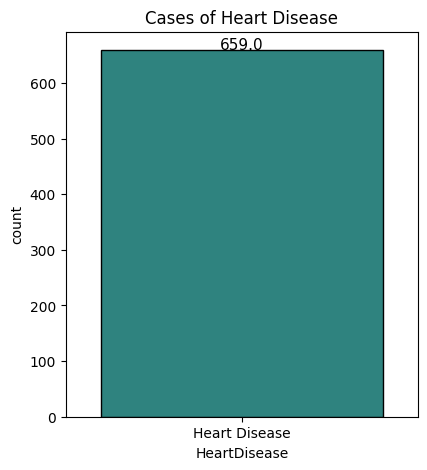

[100.0]


In [14]:


# Menghapus baris dengan nilai HeartDisease 0
data = data[data['HeartDisease'] != 0]

# Menghitung persentase kasus HeartDisease
value_counts = data['HeartDisease'].value_counts().to_dict()
hd_count = value_counts.get(1, 0)
total_count = hd_count

circle = [hd_count / total_count * 100]

# Plotting
plt.figure(figsize=(10, 5))

# Subplot untuk countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette='viridis', edgecolor='black')

# Menambahkan anotasi pada countplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)

# Menyesuaikan label sumbu x
ax.set_xticklabels(['Heart Disease'])

# Menambahkan judul
plt.title('Cases of Heart Disease')

# Menampilkan plot
plt.show()

# Mencetak nilai circle untuk verifikasi
print(circle)


In [15]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

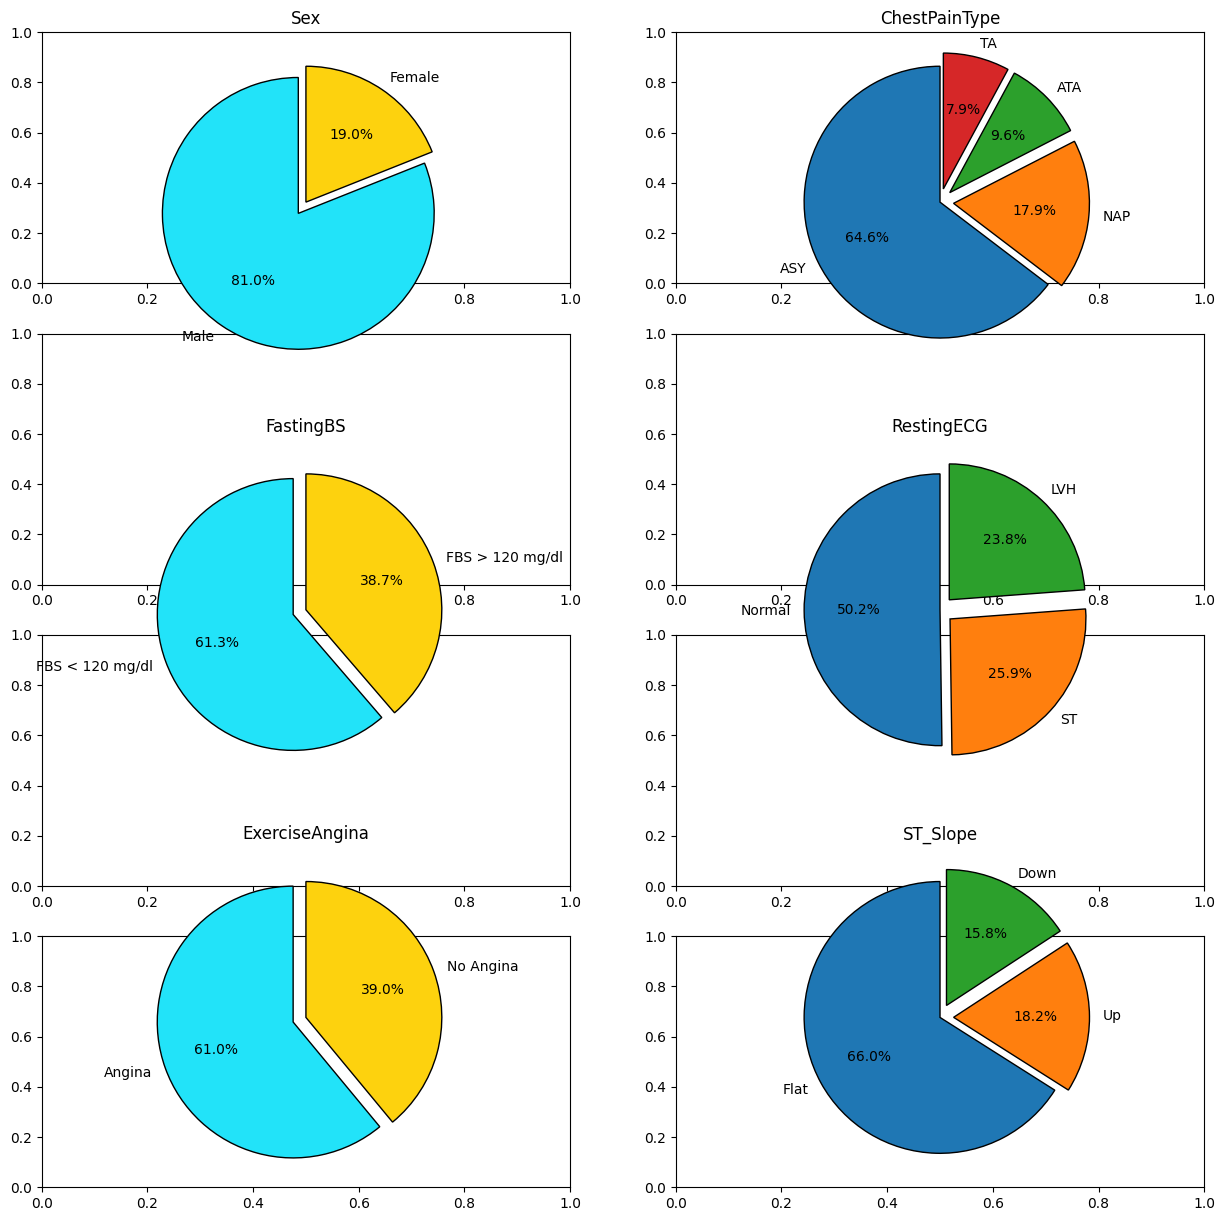

In [16]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.25,1,1,0.30,0.77,0,1,1.20,0,0.30,2,0
1,-0.41,0,2,1.31,-0.31,0,1,0.61,0,0.41,1,1
2,1.53,1,3,0.14,-0.55,1,1,1.54,1,0.32,1,1
3,0.23,0,0,1.51,1.21,0,1,2.17,0,0.56,2,1
4,2.27,1,1,0.70,-0.16,0,2,-1.22,1,0.77,2,1


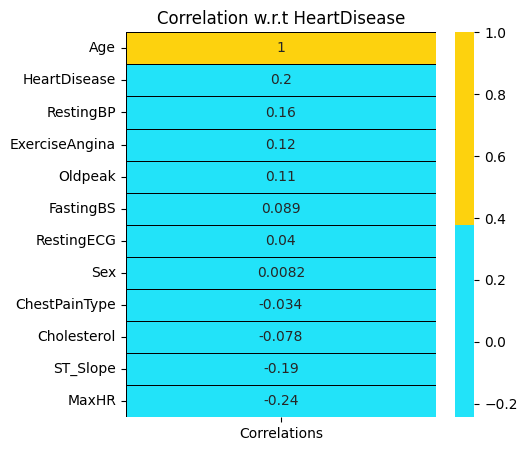

In [18]:
corr = df1.corrwith(df1['Age']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

# CHI SQUARE

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

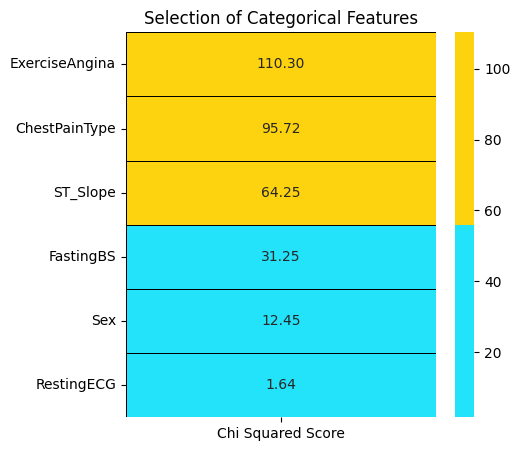

In [20]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Except RestingECG, all the remaining categorical features are pretty important for predicting heart diseases.

# ANOVA

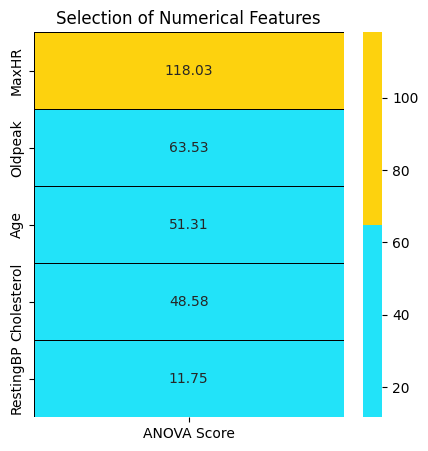

In [21]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

We will leave out RestingBP from the modeling part and take the remaining features.

# visualisasi 2

In [22]:
df = pd.read_excel("hearrtss.xlsx")


df.loc[df['HeartDisease'] == 1, 'HeartDisease'] = 'ill'
df.loc[df['HeartDisease'] == 0, 'HeartDisease'] = 'healthy'
df.loc[df['Sex'] == 'M', 'Sex'] = 'male'
df.loc[df['Sex'] == 'F', 'Sex'] = 'female'
df.loc[df['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 'yes'
df.loc[df['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 'no'

df = df.rename(columns = {'ChestPainType':'Chest Pain Type',
                          'RestingBP':'Resting BP',
                          'FastingBS':'Fasting BS',
                          'RestingECG':'Resting ECG',
                          'MaxHR':'Max HR',
                          'ExerciseAngina':'Exercise Angina',
                          'ST_Slope':'ST Slope',
                          'HeartDisease':'Heart Disease'})

### Initial parameters for plots

sns.set_theme(rc = {'grid.linewidth': 0.6, 'grid.color': 'white',
                    'axes.linewidth': 2, 'axes.facecolor': '#ECECEC',
                    'axes.labelcolor': '#000000',
                    'figure.facecolor': '#f7f7f7',
                    'xtick.color': '#000000', 'ytick.color': '#000000'})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1218 non-null   int64  
 1   Sex              1218 non-null   object 
 2   Chest Pain Type  1218 non-null   object 
 3   Resting BP       1218 non-null   int64  
 4   Cholesterol      1218 non-null   int64  
 5   Fasting BS       1218 non-null   int64  
 6   Resting ECG      1218 non-null   object 
 7   Max HR           1218 non-null   int64  
 8   Exercise Angina  1218 non-null   object 
 9   Oldpeak          1218 non-null   float64
 10  ST Slope         1218 non-null   object 
 11  Heart Disease    1218 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 114.3+ KB


In [24]:
Cat_vars = []
Num_vars = []

for col in list(df.columns):
    if ((df[col].dtype == 'float64') | (df[col].dtype == 'int64')) & (df[col].nunique() > 10):
        Num_vars.append(col)

    else: Cat_vars.append(col)

Cat_vars.remove('Heart Disease')

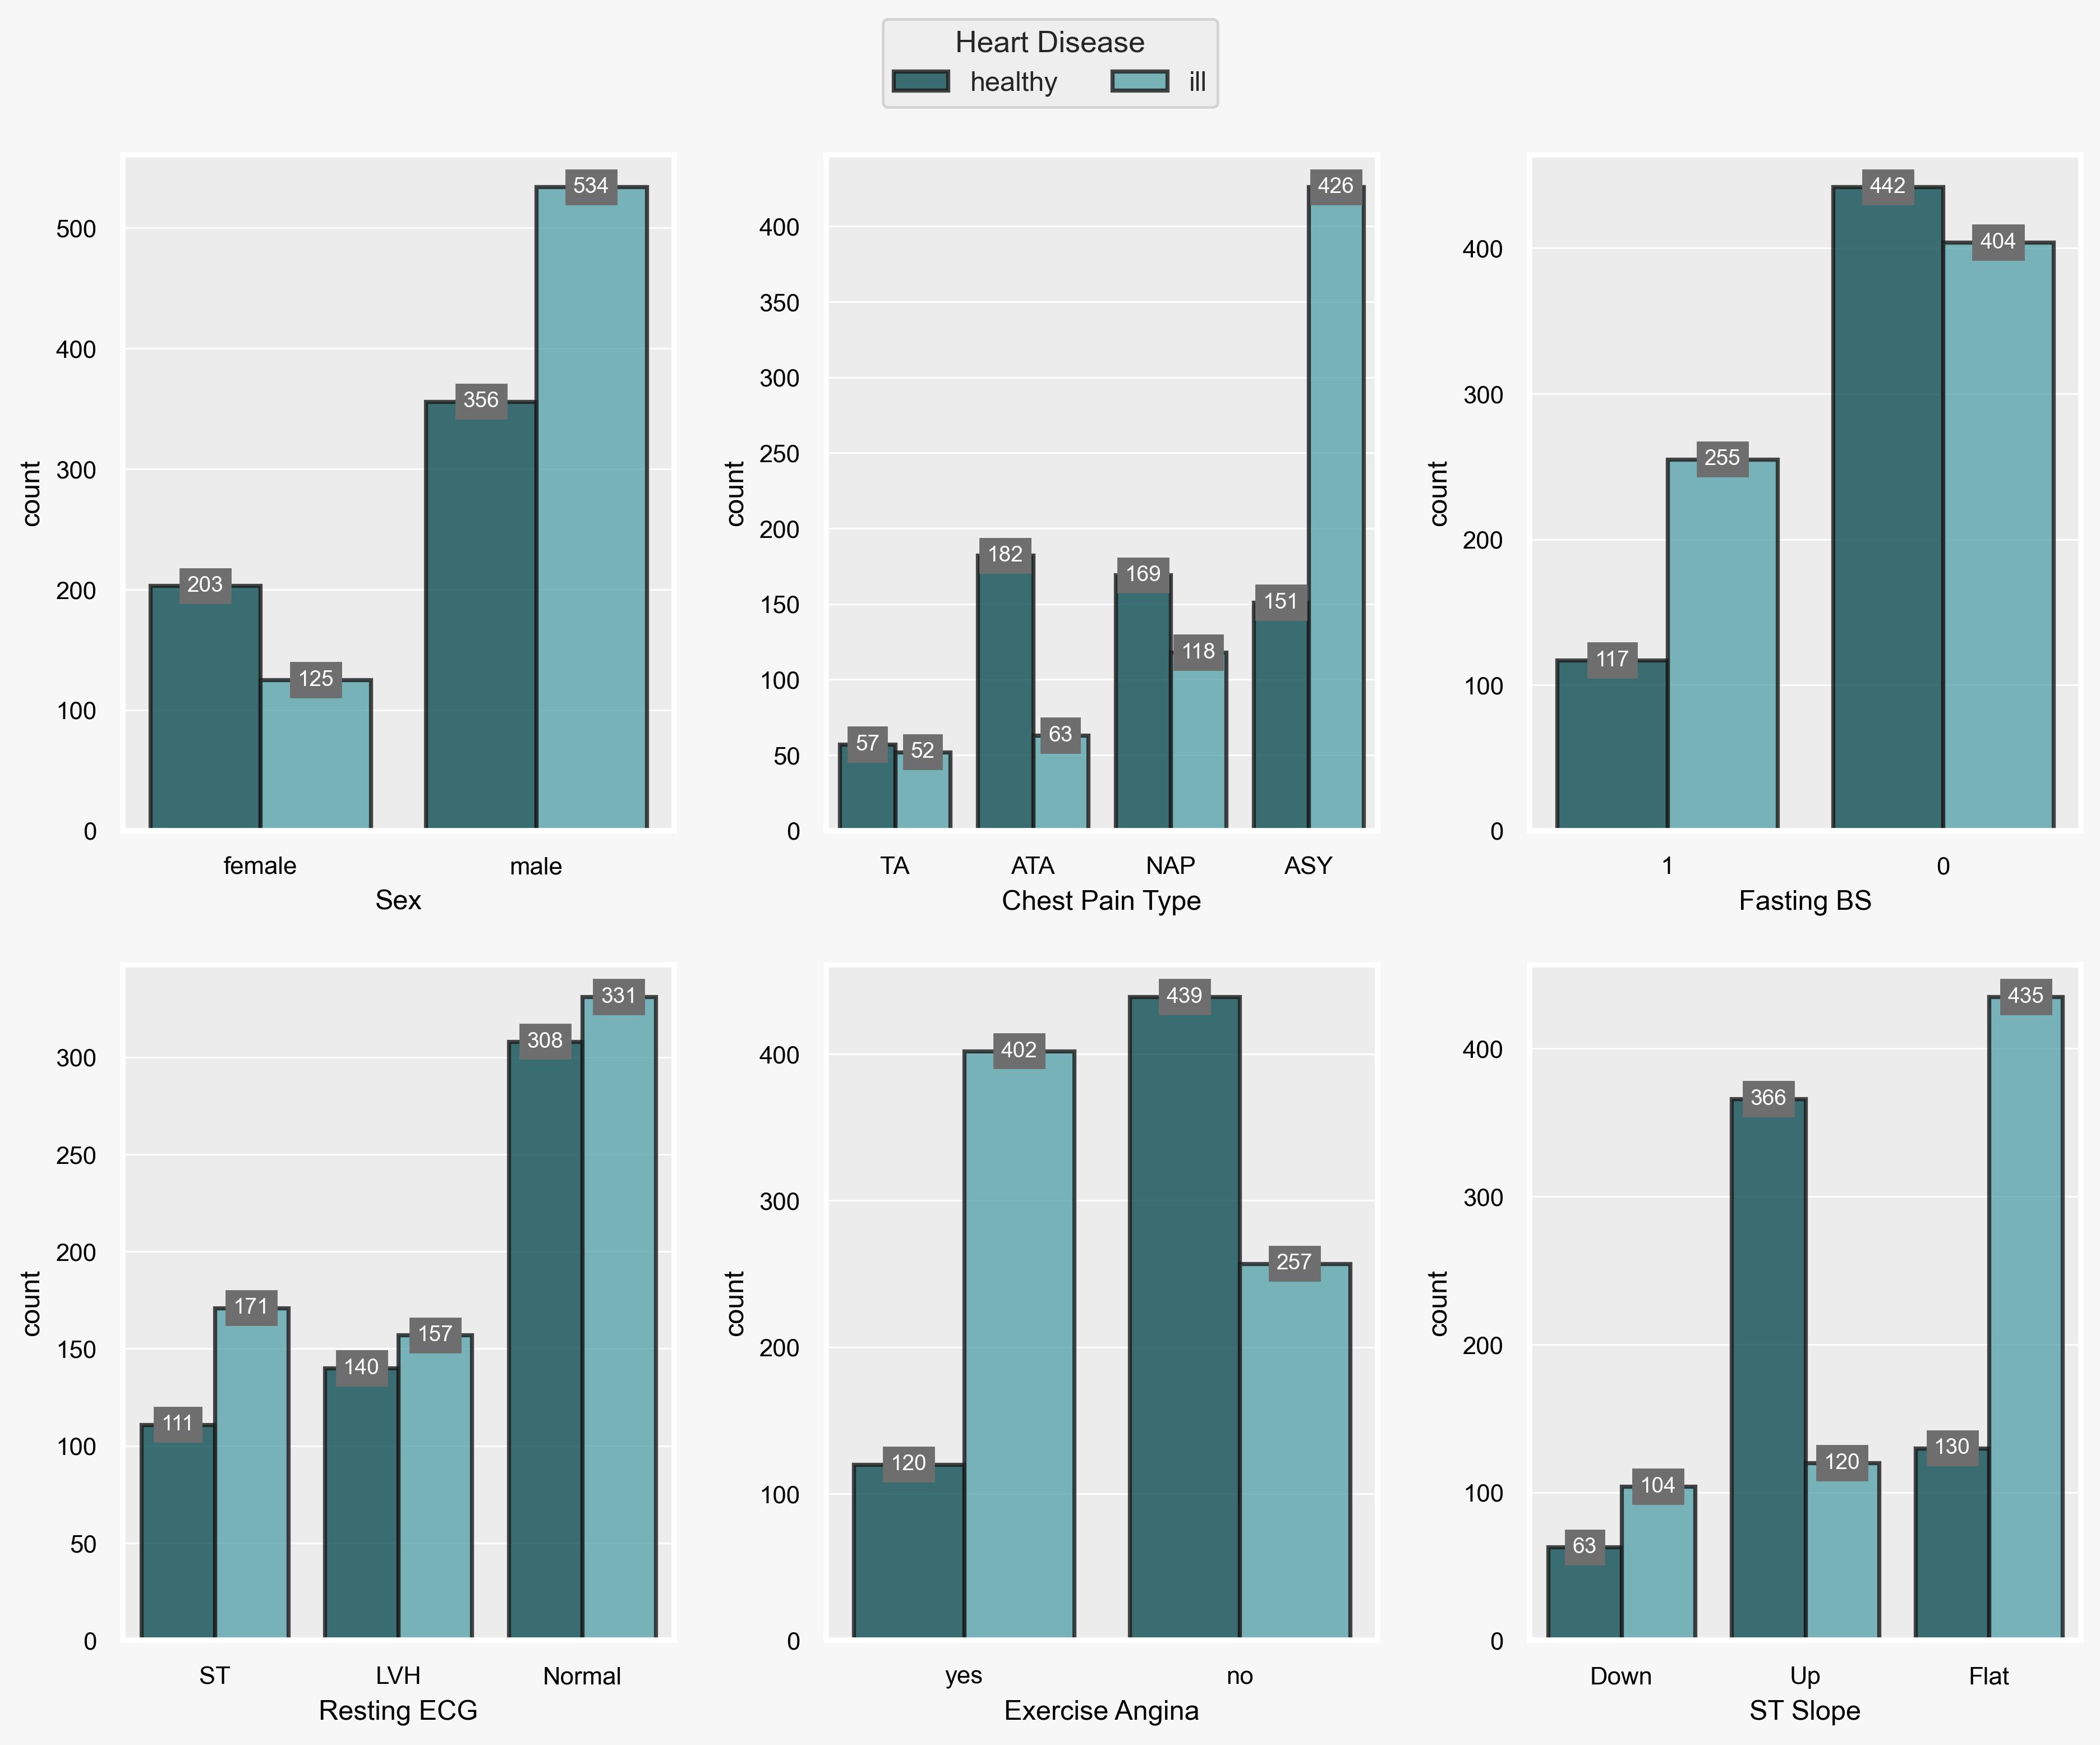

In [25]:
my_palette = ['#00575e', '#4bafb8']

with plt.rc_context(rc = {'figure.dpi': 350, 'axes.labelsize': 10,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9}):

    fig_1, ax_1 = plt.subplots(2, 3, figsize = (11, 8.5))

    for idx, (column, axes) in list(enumerate(zip(Cat_vars, ax_1.flatten()))):

        order = df.groupby(column).size().sort_values(ascending = True).index.tolist()

        cplot = sns.countplot(ax = axes, x = df[column], hue = df['Heart Disease'],
                              order = order, linewidth = 1.5,
                              edgecolor = 'k', palette = my_palette, alpha = 0.8)

        axes.get_legend().remove()

        for p in cplot.patches:

            cplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha = 'center', va = 'center', size = 8, color = 'w',
                           bbox = dict(boxstyle = 'square, pad = 0.3',
                           fc = '#6e6e6e', lw = 1, ec = '#6e6e6e'))

    else:

        [axes.set_visible(False) for axes in ax_1.flatten()[idx + 1:]]

    ### A global legend

    handles, labels = axes.get_legend_handles_labels()
    fig_1.legend(handles, labels, loc = 'upper center',
                 bbox_to_anchor = (0.5, 1.06), ncol = 2, fontsize = 10,
                 title = 'Heart Disease', title_fontsize = 11)

    plt.tight_layout(pad = 1.5)
    plt.show()

In [26]:
#Numeric Variables
df[Num_vars].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Age,1218.00,53.50,10.80,28.00,46.00,54.00,61.00,79.00
Resting BP,1218.00,134.10,19.80,0.00,120.00,130.50,146.00,200.00
Cholesterol,1218.00,211.00,101.80,0.00,181.20,226.50,275.00,603.00
Max HR,1218.00,139.80,26.80,60.00,120.00,140.00,160.00,202.00
Oldpeak,1218.00,1.30,1.40,-2.60,0.00,1.00,2.00,6.20


# PCA dengan Clustering

# PCA

In [27]:
from sklearn.decomposition import PCA

def PCA_(df, Vars_list, n_components = 10):

    ### Scaling data

    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(df[Vars_list]),
                               columns = df[Vars_list].columns)

    ### Initialising PCA

    pca = PCA(n_components = n_components)

    pca_fit = pca.fit(data_scaled)
    pca_transf = pca.transform(data_scaled)

    return pca_fit, pca_transf

PCA_results = PCA_(df, Num_vars, n_components = len(Num_vars))

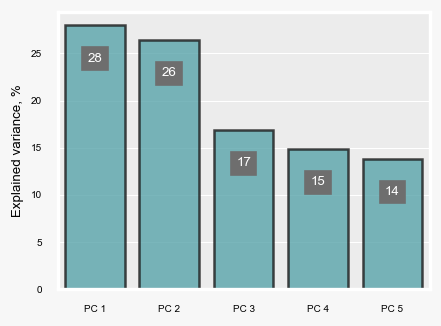

In [28]:
PCA_variance = pd.DataFrame({'Explained variance, %':
                             PCA_results[0].explained_variance_ratio_*100})

with plt.rc_context(rc = {'figure.dpi': 120, 'axes.labelsize': 8,
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}):

    fig_5, ax_5 = plt.subplots(1, 1, figsize = (4, 3))

    bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 6)],
                      y = PCA_variance['Explained variance, %'],
                      linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                      alpha = 0.8)

    ### Annotations

    for p in bar.patches:

        bar.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha = 'center', va = 'center', size = 8, color = 'w',
                      xytext = (0, -20), textcoords = 'offset points',
                      bbox = dict(boxstyle = 'square, pad = 0.4',
                                  fc = '#6e6e6e', lw = 1, ec = '#6e6e6e'))


    plt.show()

In [29]:
pd.DataFrame(PCA_results[0].components_, columns = df[Num_vars].columns,
             index = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']).round(2).T

,PC 1,PC 2,PC 3,PC 4,PC 5
Age,0.62,-0.12,-0.10,0.69,-0.34
Resting BP,0.31,-0.52,-0.61,-0.50,-0.09
Cholesterol,-0.32,-0.60,-0.10,0.46,0.57
Max HR,-0.61,-0.26,-0.08,0.13,-0.73
Oldpeak,0.22,-0.54,0.77,-0.23,-0.12


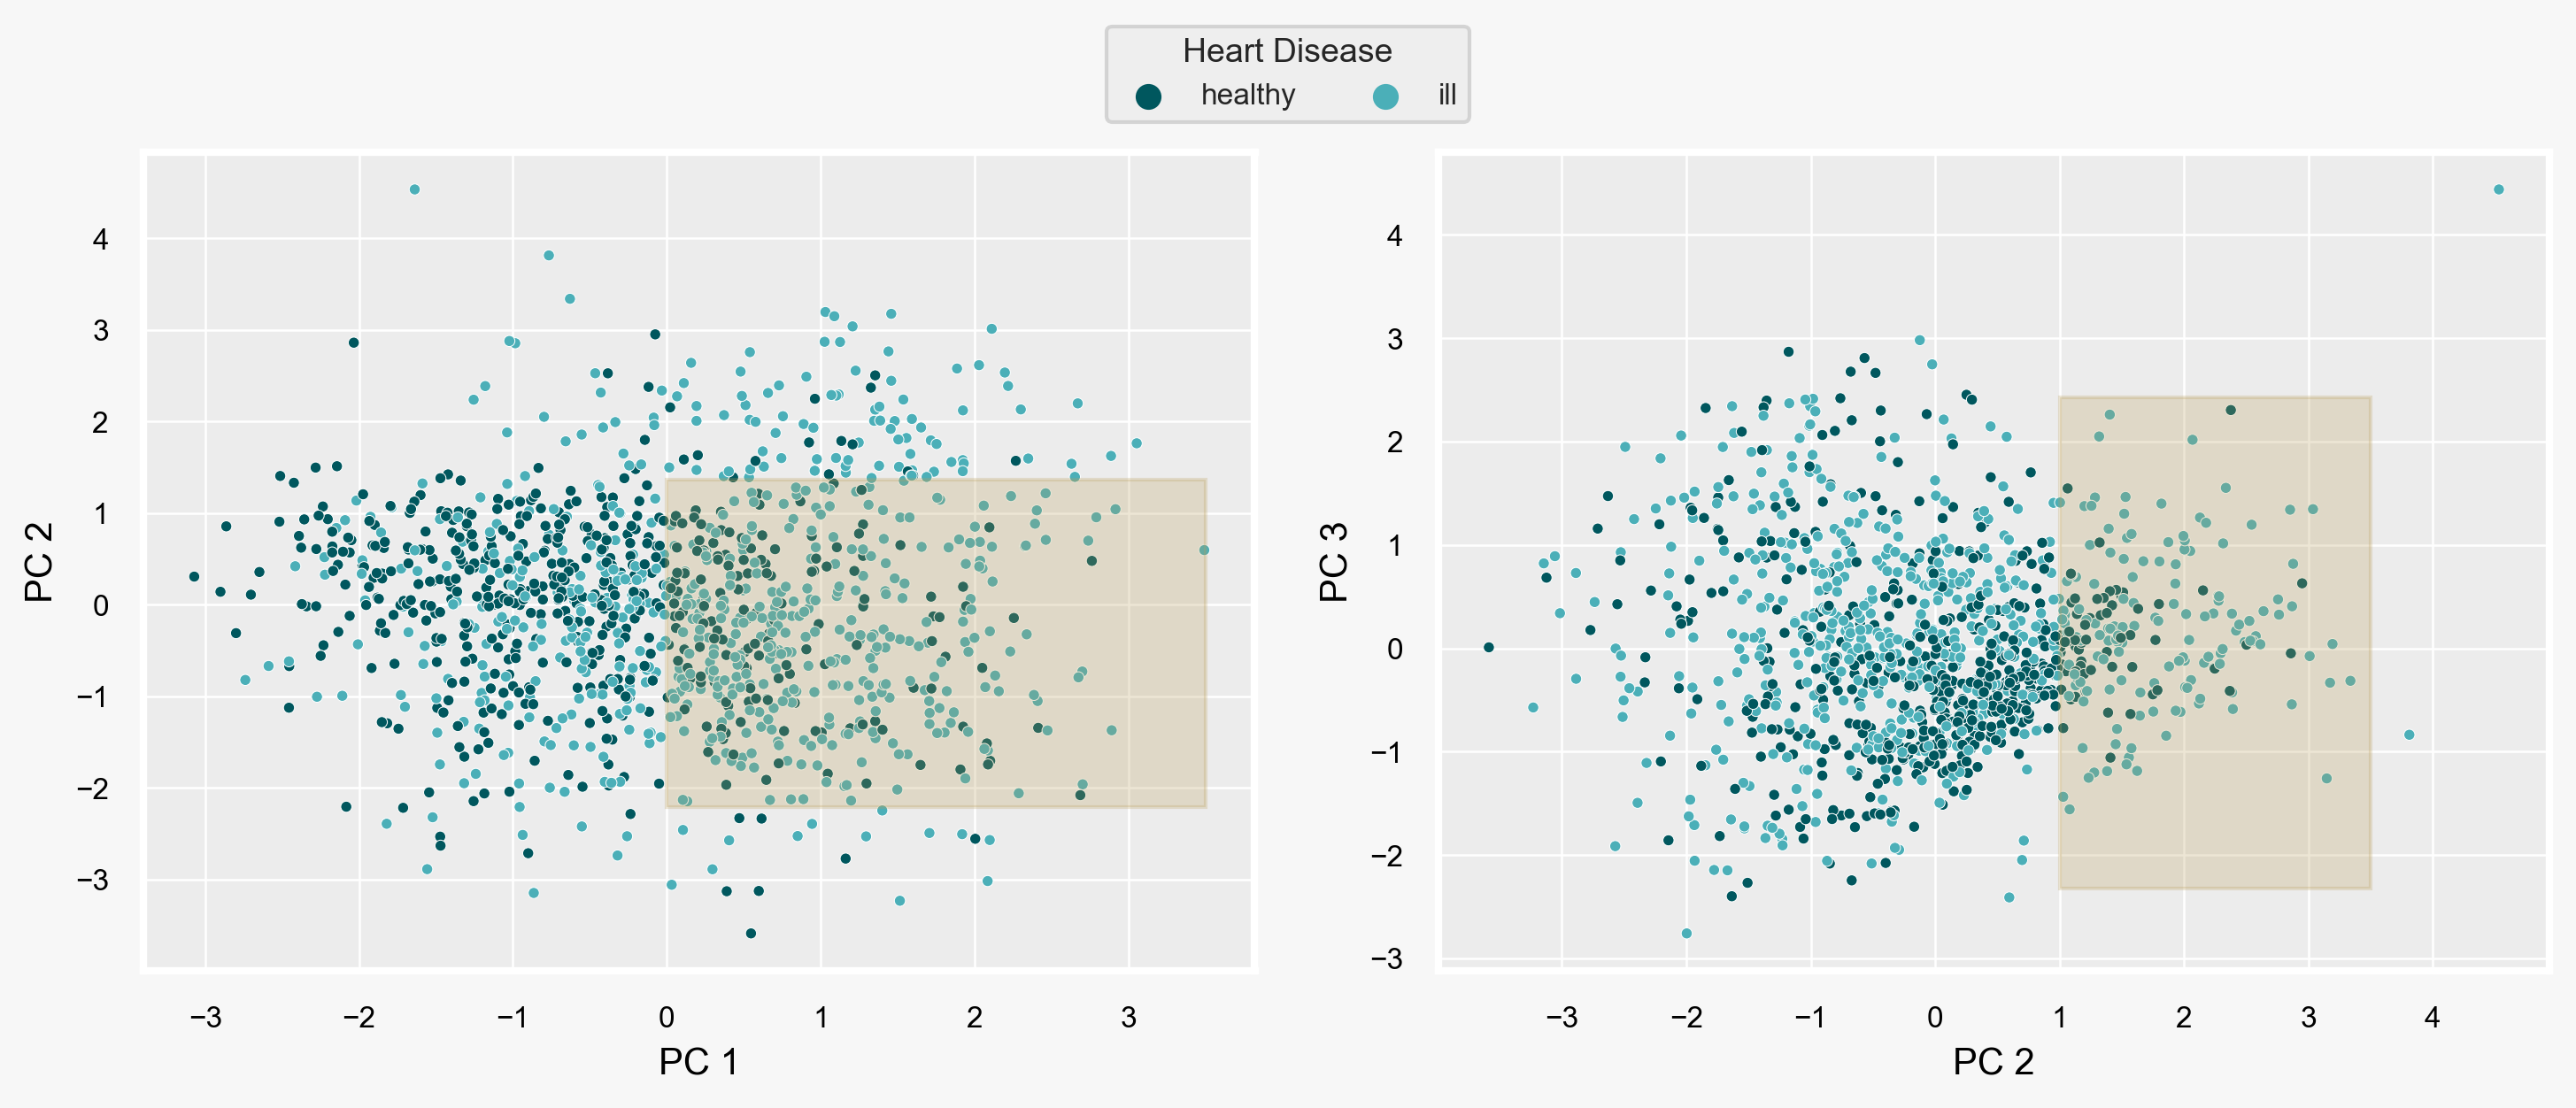

In [30]:
PCA_scores = pd.DataFrame(PCA_results[1], columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 10,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,
                          'legend.fontsize': 7, 'legend.title_fontsize': 8}):

    fig_6, ax_6 = plt.subplots(1, 2, figsize = (10, 4))

    ### PC 1 & PC 2

    sns.scatterplot(ax = ax_6[0], x = PCA_scores['PC 1'], y = PCA_scores['PC 2'],
                    hue = df['Heart Disease'], palette = my_palette , s = 9)

    ax_6[0].get_legend().remove()

    ax_6[0].axvspan(xmin = 0, xmax = 3.5,
                    ymin = 0.2, ymax = 0.6,
                    alpha = 0.25, color = '#ba9e59')

    ### PC 2 & PC 3

    sns.scatterplot(ax = ax_6[1], x = PCA_scores['PC 2'], y = PCA_scores['PC 3'],
                    hue = df['Heart Disease'], palette = my_palette, s = 9)

    ax_6[1].get_legend().remove()

    ax_6[1].axvspan(xmin = 1, xmax = 3.5,
                    ymin = 0.1, ymax = 0.7,
                    alpha = 0.25, color = '#ba9e59')

    ### A global legend

    handles, labels = ax_6[1].get_legend_handles_labels()
    fig_6.legend(handles, labels, loc = 'upper center',
                 bbox_to_anchor = (0.5, 1.07), ncol = 2,
                 fontsize = 8, title = 'Heart Disease', title_fontsize = 9)

    plt.tight_layout(pad = 1.5)
    plt.show()

# Clustering

# A gaussian mixture model

In [31]:
# Ensure the column name is correctly referenced
data= data[data['HeartDisease'] != 0]

# Optionally, you can reset the index if needed
data.reset_index(drop=True, inplace=True)


In [32]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
1,70,M,TA,137,155,1,Normal,181,Y,0.20,Flat,1
2,56,F,ASY,164,334,0,Normal,198,N,2.30,Up,1
3,78,M,ATA,148,195,0,ST,107,Y,4.20,Up,1
4,70,M,TA,120,200,0,LVH,154,Y,0.10,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
654,57,F,ASY,140,241,0,Normal,123,Y,0.20,Flat,1
655,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
656,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
657,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1


In [33]:
# membuat fitur yang ingin dianalisa saja
features  = ["Age","Sex","RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]
data = data.dropna(subset=features)
df= data[features].copy()
df

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,49,F,160,180,156,1.00,1
1,70,M,137,155,181,0.20,1
2,56,F,164,334,198,2.30,1
3,78,M,148,195,107,4.20,1
4,70,M,120,200,154,0.10,1
...,...,...,...,...,...,...,...
654,57,F,140,241,123,0.20,1
655,45,M,110,264,132,1.20,1
656,68,M,144,193,141,3.40,1
657,57,M,130,131,115,1.20,1


In [34]:
df['Sex'] = df['Sex'].replace(['M', 'F'], [0,1])
df.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,49,1,160,180,156,1.00,1
1,70,0,137,155,181,0.20,1
2,56,1,164,334,198,2.30,1
3,78,0,148,195,107,4.20,1
4,70,0,120,200,154,0.10,1


In [35]:
from sklearn.mixture import GaussianMixture
import numpy as np

def Gaussian_mix_cluster_tuning(df, features, max_cluster=7):
    bic = []
    lowest_bic = np.infty
    n_components_range = range(1, max_cluster)

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full')
        gmm.fit(df[features])
        bic.append(gmm.bic(df[features]))

    return bic


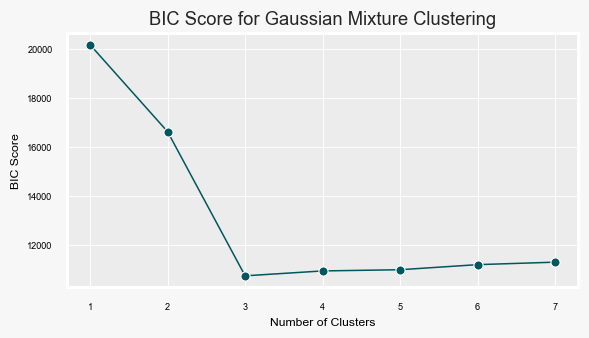

In [36]:


# Assuming 'data' is your DataFrame and 'features' are the selected features
features = ["Age", "Sex", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]
data = data.dropna(subset=features)
df = data[features].copy()
df['Sex'] = df['Sex'].replace(['M', 'F'], [0,1])
df.head()

# Perform Gaussian Mixture Model clustering tuning
Cluster_tuning_Gaussian_mix = pd.DataFrame({'Cluster': range(1, 8),
                                            'BIC': Gaussian_mix_cluster_tuning(df, features, max_cluster=8)})

# Plotting the BIC scores
with plt.rc_context(rc={'figure.dpi': 110, 'axes.labelsize': 8,
                         'xtick.labelsize': 6, 'ytick.labelsize': 6}):

    fig_7, ax_7 = plt.subplots(1, 1, figsize=(6, 3))

    sns.lineplot(x=Cluster_tuning_Gaussian_mix['Cluster'],
                 y=Cluster_tuning_Gaussian_mix['BIC'],
                 color='#00575e', marker='o', linewidth=1)

    plt.xlabel('Number of Clusters')
    plt.ylabel('BIC Score')
    plt.title('BIC Score for Gaussian Mixture Clustering')
    plt.show()


In [37]:
# Create and fit Gaussian Mixture Model with 4 components
Gaussian_model = GaussianMixture(n_components=5, covariance_type='full')
df['Gaussian_mixture'] = Gaussian_model.fit_predict(df[features])

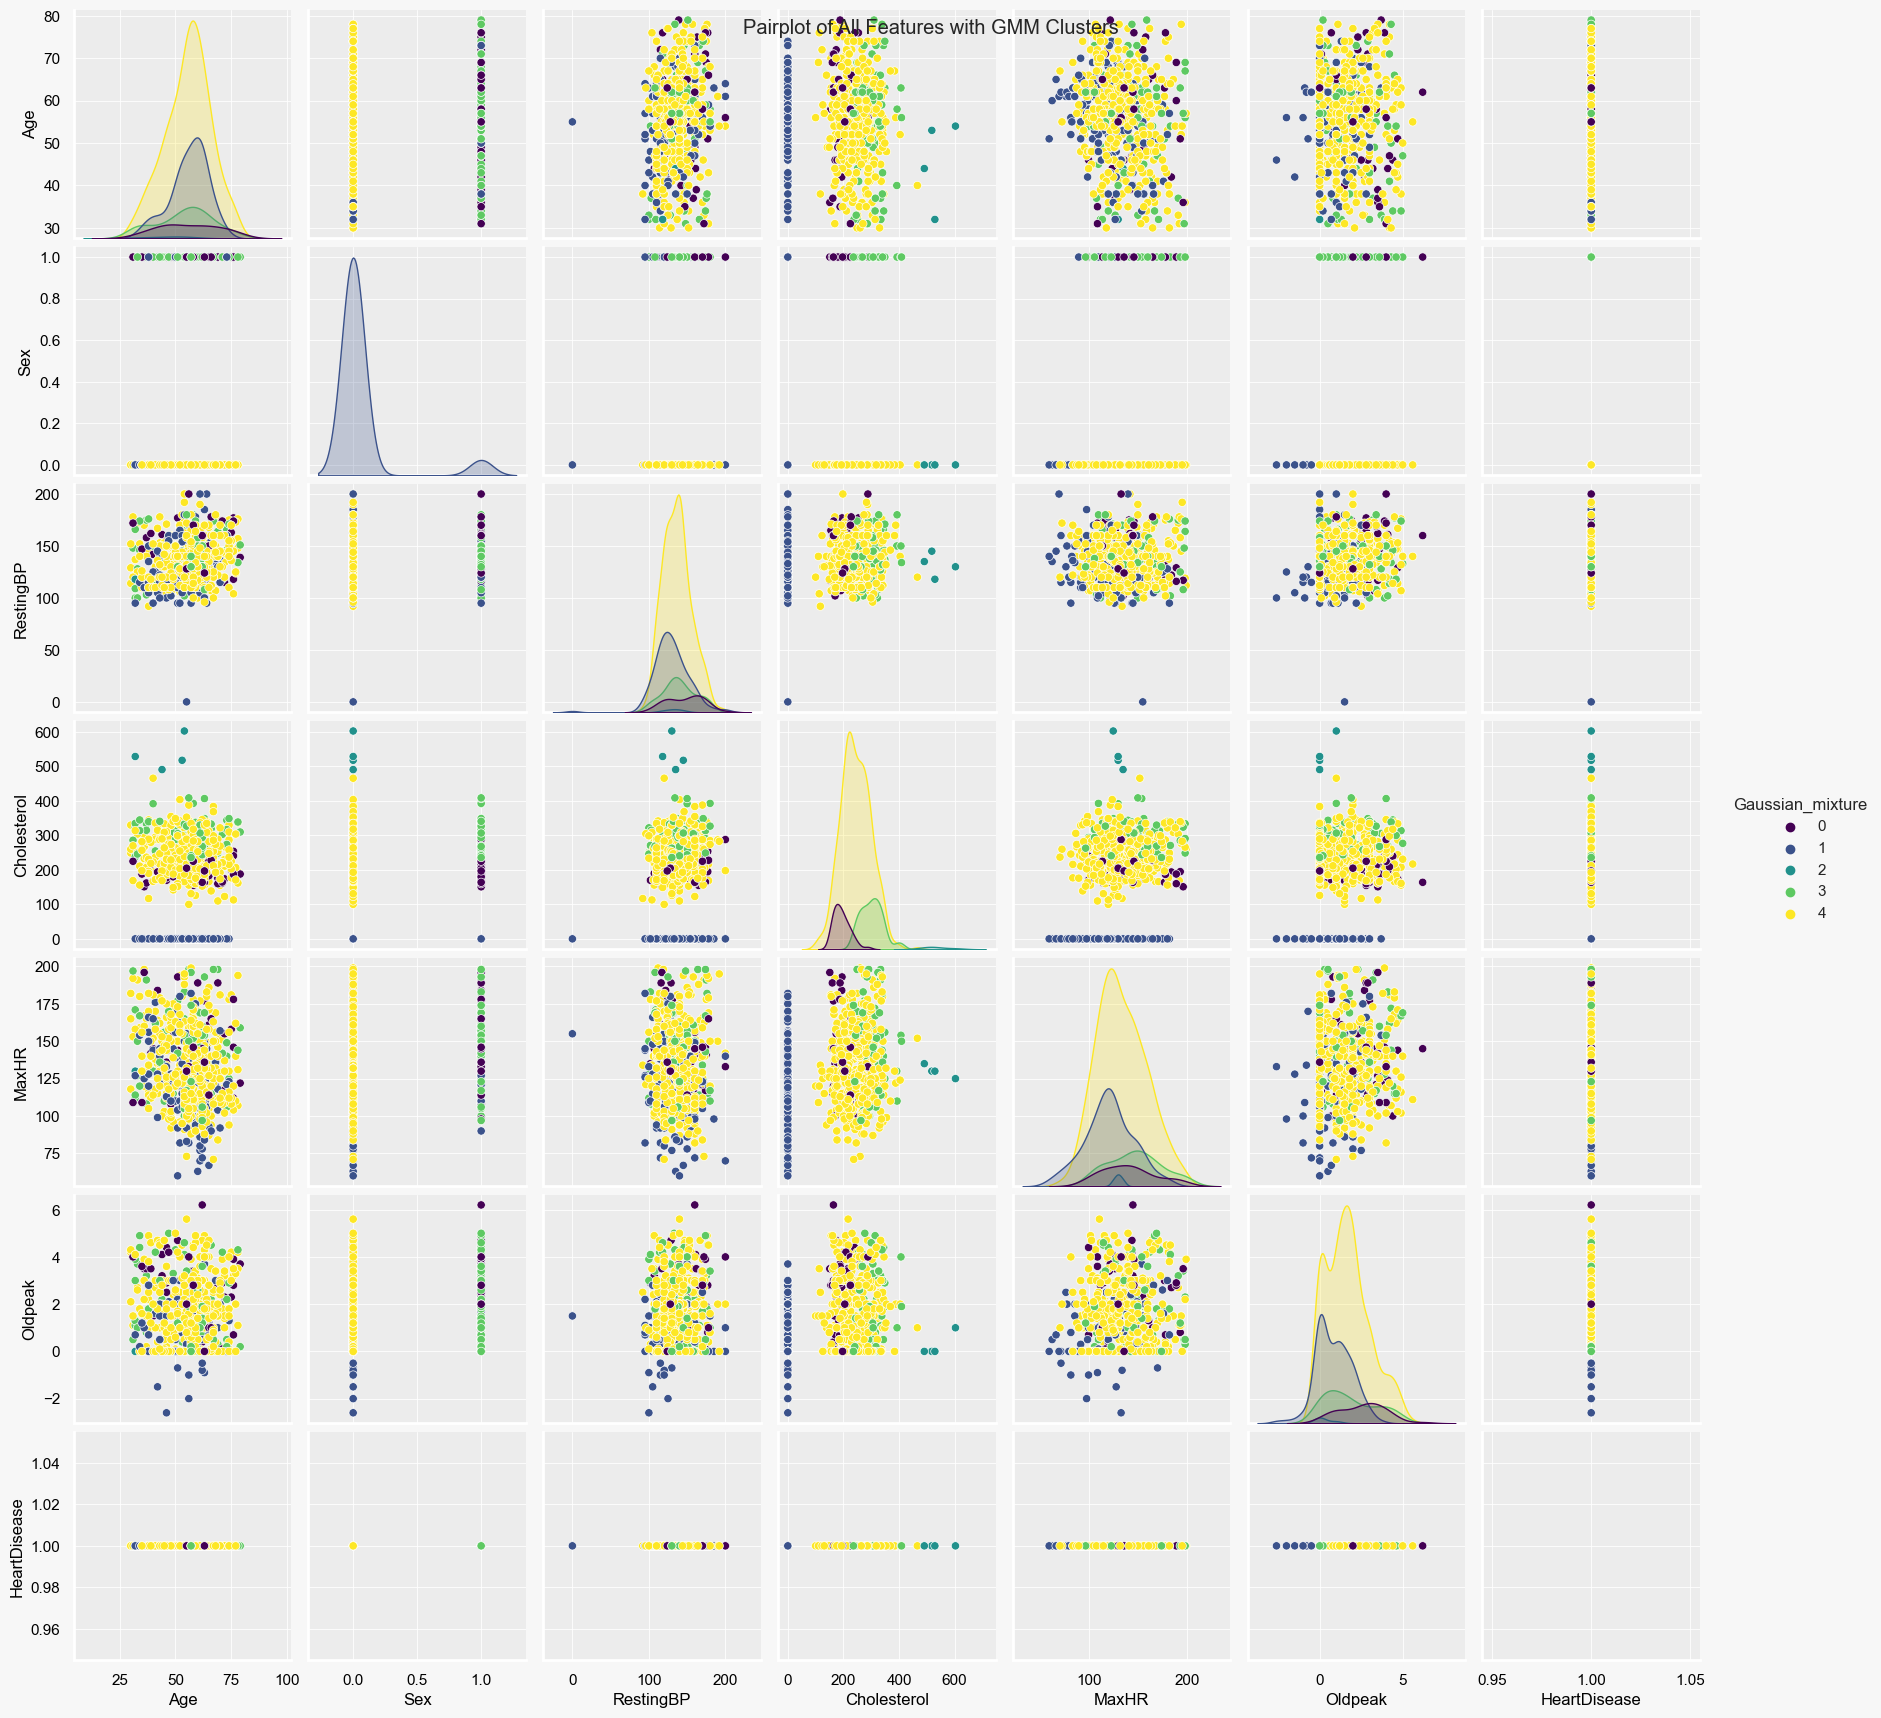

In [38]:
import seaborn as sns

# Create and fit Gaussian Mixture Model with 4 components
Gaussian_model = GaussianMixture(n_components=5, covariance_type='full')
df['Gaussian_mixture'] = Gaussian_model.fit_predict(df[features])

# Visualize the clusters for all features
sns.pairplot(df, hue='Gaussian_mixture', palette='viridis')
plt.suptitle('Pairplot of All Features with GMM Clusters')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette_avg_gmm = silhouette_score(df[features], df['Gaussian_mixture'])
print("Silhouette Score for GMM:", silhouette_avg_gmm)

# Calculate Calinski-Harabaz score
ch_score_gmm = calinski_harabasz_score(df[features], df['Gaussian_mixture'])
print("Calinski-Harabasz Score for GMM:", ch_score_gmm)


Silhouette Score for GMM: 0.1275524619907973
Calinski-Harabasz Score for GMM: 642.2109277368208


In [40]:
# Skor Silhouette
silhouette_score_gmm = silhouette_avg_gmm
silhouette_min = -1  # Nilai minimum untuk Silhouette Score
silhouette_max = 1   # Nilai maksimum untuk Silhouette Score
silhouette_percent = (silhouette_score_gmm - silhouette_min) / (silhouette_max - silhouette_min) * 100
print("Silhouette Score (percent):", silhouette_percent)

# Skor Calinski-Harabaz
calinski_harabaz_score_gmm = ch_score_gmm
calinski_harabaz_min = 0  # Nilai minimum untuk Calinski-Harabaz Score
# Anda perlu menentukan nilai maksimum yang tepat berdasarkan karakteristik data Anda
calinski_harabaz_max = 1000  # Nilai maksimum yang mungkin
calinski_harabaz_percent = (calinski_harabaz_score_gmm - calinski_harabaz_min) / (calinski_harabaz_max - calinski_harabaz_min) * 100
print("Calinski-Harabaz Score (percent):", calinski_harabaz_percent)

Silhouette Score (percent): 56.37762309953986
Calinski-Harabaz Score (percent): 64.22109277368209


# K-means clustering

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               659 non-null    int64  
 1   Sex               659 non-null    int64  
 2   RestingBP         659 non-null    int64  
 3   Cholesterol       659 non-null    int64  
 4   MaxHR             659 non-null    int64  
 5   Oldpeak           659 non-null    float64
 6   HeartDisease      659 non-null    int64  
 7   Gaussian_mixture  659 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 41.3 KB


In [42]:
def K_means_claster_tuning(df, max_cluster = 8):

    ### Scaling data

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)

    ### Calculating inertia_ for each number of clusters

    SSE = []

    for cluster in range(1, max_cluster):
        kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 999)
        kmeans.fit(data_scaled)
        SSE.append(kmeans.inertia_)

    df_plot = pd.DataFrame({'Cluster': range(1, max_cluster), 'SSE': SSE})

    return df_plot

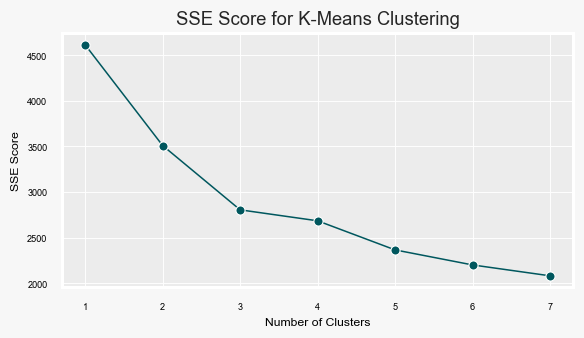

In [43]:
from sklearn.cluster import KMeans
Cluster_tuning_k_means = K_means_claster_tuning(df, max_cluster = 8)

with plt.rc_context(rc = {'figure.dpi': 110, 'axes.labelsize': 8,
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}):

    fig_8, ax_8 = plt.subplots(1, 1, figsize = (6, 3))

    sns.lineplot(x = Cluster_tuning_k_means['Cluster'].astype('int64'),
                 y = Cluster_tuning_k_means['SSE'], color = '#00575e',
                 marker = 'o', linewidth = 1)

    plt.xticks(range(1, 8))

    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE Score')
    plt.title('SSE Score for K-Means Clustering')
    plt.show()

In [44]:
def K_means_clastering(df_train, Vars_list, n_clusters=5):
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    # Scaling data
    scaler = StandardScaler()
    df_train_scaled = scaler.fit_transform(df_train)

    # Initiating KMeans algorithm
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=999)

    # Getting clusters
    kmeans_results = kmeans.fit_predict(df_train_scaled)

    # Appending cluster labels to the dataframe
    df_train['Cluster'] = kmeans_results

    return df_train

# Call the function to cluster the dataframe
df = K_means_clastering(df, Num_vars, n_clusters=5)


In [45]:
# Memisahkan data berdasarkan klaster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]
cluster_4 = df[df['Cluster'] == 4]

# Menampilkan data di setiap klaster
print("Apa saja di Cluster 0:")
print(cluster_0)

print("\nApa saja di Cluster 1:")
print(cluster_1)

print("\nApa saja di Cluster 2:")
print(cluster_2)

print("\nApa saja di Cluster 3:")
print(cluster_3)

print("\nApa saja di Cluster 4:")
print(cluster_4)

Apa saja di Cluster 0:
     Age  Sex  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  \
3     78    0        148          195    107     4.20             1   
11    38    0        176          208    116     4.90             1   
16    66    0        107          282    100     3.50             1   
20    60    0        122          181    109     3.10             1   
24    63    0        107          156    102     4.90             1   
..   ...  ...        ...          ...    ...      ...           ...   
649   67    0        152          212    150     0.80             1   
651   63    0        140          187    144     4.00             1   
653   59    0        164          176     90     1.00             1   
656   68    0        144          193    141     3.40             1   
657   57    0        130          131    115     1.20             1   

     Gaussian_mixture  Cluster  
3                   4        0  
11                  4        0  
16                  4    

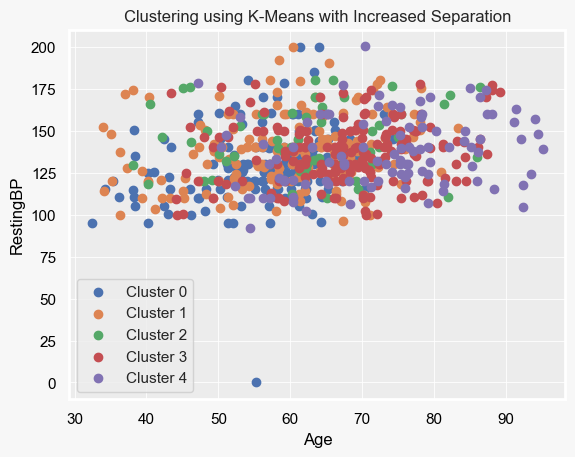

In [46]:
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming df is your DataFrame

# Ubah kolom 'Sex' menjadi tipe data numerik
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

# Jika ada kolom lain yang berisi string, Anda perlu mengonversi juga
# Misalnya, jika ada kolom 'HeartDisease' yang berisi string 'Present' dan 'Absent'
# Anda bisa mengonversinya seperti ini:
df['HeartDisease'] = df['HeartDisease'].map({'Absent': 0, 'Present': 1})

# Use the appropriate columns as features for clustering
X = df[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']]

# Perform data preprocessing to handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now, proceed with KMeans clustering
def find_clusters_kmeans(X, n_clusters, rseed=0):
    kmeans = KMeans(n_clusters=n_clusters, random_state=rseed)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    return centers, labels

centers_kmeans, labels_kmeans = find_clusters_kmeans(X_imputed, 5, rseed=0)

# Plot clusters using scatter plot with KMeans
for i in range(5):
    cluster_data = X[labels_kmeans == i]
    noise = np.random.rand(len(cluster_data), 2) * 0.5  # Add some noise to scatter points
    plt.scatter(cluster_data['Age'] + 4*i + noise[:, 0], cluster_data['RestingBP'] + noise[:, 1], label=f'Cluster {i}', cmap='viridis')

plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Clustering using K-Means with Increased Separation')
plt.legend()
plt.show()


In [47]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean' (replace missing values with mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Now, X_imputed contains no missing values and can be used for clustering


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Initialize SimpleImputer with strategy 'mean' (replace missing values with mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Initialize KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)

# Perform clustering
labels_kmeans = kmeans.fit_predict(X_imputed)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_imputed, labels_kmeans)
print("Silhouette Score:", silhouette_avg)

# Calculate Calinski-Harabasz score
ch_score = calinski_harabasz_score(X_imputed, labels_kmeans)
print("Calinski-Harabasz Score:", ch_score)


Silhouette Score: 0.36399518610189263
Calinski-Harabasz Score: 1358.7398289089758


In [49]:
# Skor Silhouette
silhouette_score = 0.537335725464048
silhouette_min = -1  # Nilai minimum untuk Silhouette Score
silhouette_max = 1   # Nilai maksimum untuk Silhouette Score
silhouette_percent = (silhouette_score - silhouette_min) / (silhouette_max - silhouette_min) * 100
print("Silhouette Score (percent):", silhouette_percent)

# Skor Calinski-Harabaz
calinski_harabaz_score = 570.0768354883646
calinski_harabaz_min = 0  # Nilai minimum untuk Calinski-Harabaz Score
# Perhatikan bahwa Anda perlu menentukan nilai maksimum yang tepat berdasarkan karakteristik data Anda
# Sebagai contoh, saya akan menggunakan nilai maksimum 1000
calinski_harabaz_max = 1000  # Nilai maksimum yang mungkin
calinski_harabaz_percent = (calinski_harabaz_score - calinski_harabaz_min) / (calinski_harabaz_max - calinski_harabaz_min) * 100
print("Calinski-Harabaz Score (percent):", calinski_harabaz_percent)


Silhouette Score (percent): 76.86678627320241
Calinski-Harabaz Score (percent): 57.00768354883646


# K MEDOIDS

In [50]:
#pip install scikit-learn-extra


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
features  = ["Age","Sex","RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]

In [53]:
data = data.dropna(subset=features)

In [54]:
df= data[features].copy()

In [55]:
df

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,49,F,160,180,156,1.00,1
1,70,M,137,155,181,0.20,1
2,56,F,164,334,198,2.30,1
3,78,M,148,195,107,4.20,1
4,70,M,120,200,154,0.10,1
...,...,...,...,...,...,...,...
654,57,F,140,241,123,0.20,1
655,45,M,110,264,132,1.20,1
656,68,M,144,193,141,3.40,1
657,57,M,130,131,115,1.20,1


In [56]:
df['Sex'] = df['Sex'].replace(['M', 'F'], [0,1])
df.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,49,1,160,180,156,1.00,1
1,70,0,137,155,181,0.20,1
2,56,1,164,334,198,2.30,1
3,78,0,148,195,107,4.20,1
4,70,0,120,200,154,0.10,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           659 non-null    int64  
 1   Sex           659 non-null    int64  
 2   RestingBP     659 non-null    int64  
 3   Cholesterol   659 non-null    int64  
 4   MaxHR         659 non-null    int64  
 5   Oldpeak       659 non-null    float64
 6   HeartDisease  659 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.2 KB


In [58]:
def KMedoids_claster_tuning(df, max_cluster = 8):

    from sklearn_extra.cluster import KMedoids
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    ### Scaling data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)

    ### Calculating inertia_ for each number of clusters

    SSE = []

    for cluster in range(1, max_cluster):
        kmedoids = KMedoids(n_clusters = cluster, random_state = 999)
        kmedoids.fit(data_scaled)
        SSE.append(kmedoids.inertia_)

    df_plot = pd.DataFrame({'Cluster': range(1, max_cluster), 'SSE': SSE})

    return df_plot


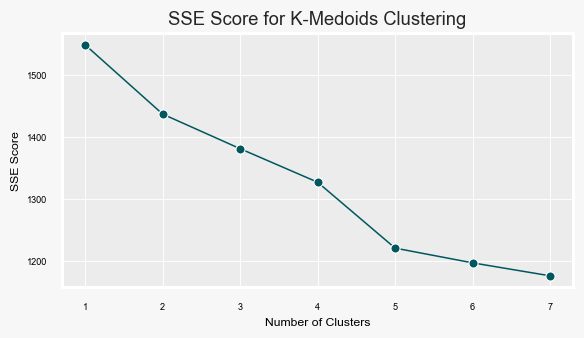

In [59]:
from sklearn_extra.cluster import KMedoids

def KMedoids_claster_tuning(df, max_cluster = 8):
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    # Scaling data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)

    # Calculating inertia_ for each number of clusters
    SSE = []

    for cluster in range(1, max_cluster):
        kmedoids = KMedoids(n_clusters = cluster, random_state = 999)
        kmedoids.fit(data_scaled)
        SSE.append(kmedoids.inertia_)

    df_plot = pd.DataFrame({'Cluster': range(1, max_cluster), 'SSE': SSE})

    return df_plot

Cluster_tuning_k_medoids = KMedoids_claster_tuning(df, max_cluster = 8)

import matplotlib.pyplot as plt
import seaborn as sns

with plt.rc_context(rc = {'figure.dpi': 110, 'axes.labelsize': 8,
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}):

    fig_8, ax_8 = plt.subplots(1, 1, figsize = (6, 3))

    sns.lineplot(x = Cluster_tuning_k_medoids['Cluster'].astype('int64'),
                 y = Cluster_tuning_k_medoids['SSE'], color = '#00575e',
                 marker = 'o', linewidth = 1)

    plt.xticks(range(1, 8))

    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE Score')
    plt.title('SSE Score for K-Medoids Clustering')


In [60]:
def KMedoids_clustering(df_train, Vars_list, n_clusters=5):
    from sklearn_extra.cluster import KMedoids
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    # Scaling data
    scaler = StandardScaler()
    df_train_scaled = scaler.fit_transform(df_train)

    # Initiating KMedoids algorithm
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=999)

    # Getting clusters
    kmedoids_results = kmedoids.fit_predict(df_train_scaled)

    # Appending cluster labels to the dataframe
    df_train['Cluster'] = kmedoids_results

    return df_train

# Call the function to cluster the dataframe
df = KMedoids_clustering(df, Num_vars, n_clusters=5)


In [61]:
# Memisahkan data berdasarkan klaster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]
cluster_4 = df[df['Cluster'] == 4]

# Menampilkan data di setiap klaster
print("Apa saja di Cluster 0:")
print(cluster_0)

print("\nApa saja di Cluster 1:")
print(cluster_1)

print("\nApa saja di Cluster 2:")
print(cluster_2)

print("\nApa saja di Cluster 3:")
print(cluster_3)

print("\nApa saja di Cluster 4:")
print(cluster_4)

Apa saja di Cluster 0:
     Age  Sex  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Cluster
3     78    0        148          195    107     4.20             1        0
5     68    1        128          254    150     3.00             1        0
6     44    1        161          198    124     4.10             1        0
7     50    1        117          313    172     4.30             1        0
11    38    0        176          208    116     4.90             1        0
..   ...  ...        ...          ...    ...      ...           ...      ...
645   55    1        128          205    130     2.00             1        0
647   58    0        114          318    140     4.40             1        0
648   58    1        170          225    146     2.80             1        0
651   63    0        140          187    144     4.00             1        0
656   68    0        144          193    141     3.40             1        0

[134 rows x 8 columns]

Apa saja di Cluster 1:
     

In [62]:
#pip install kneed

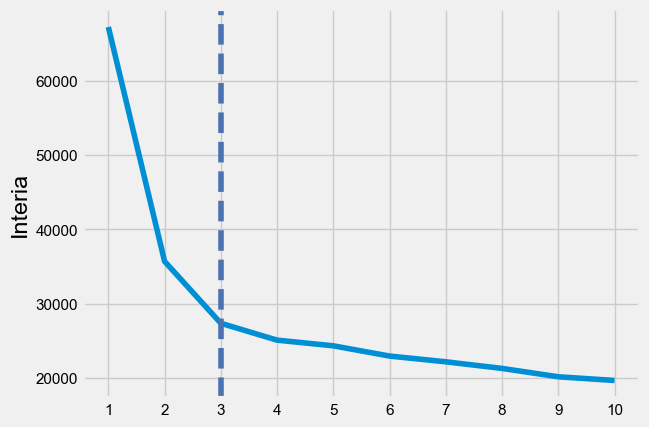

In [63]:
from sklearn_extra.cluster import KMedoids

List = []
for k in range(1,11):#this range is optional
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state =5 )
    kmedoids.fit(df)
    List.append( kmedoids.inertia_)

from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()

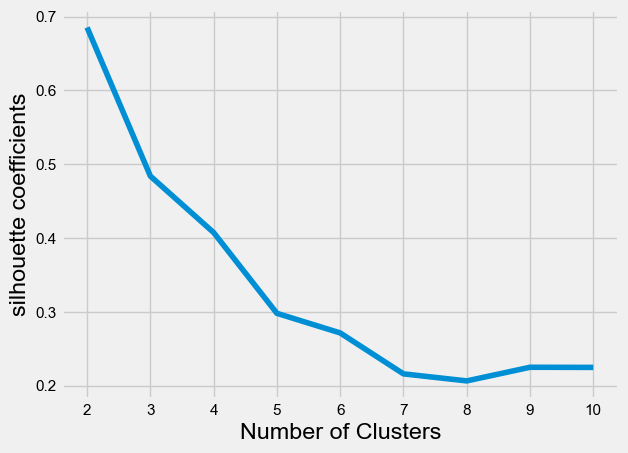

In [64]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
silhouette_coefficients = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5)
    kmedoids.fit(df)
    score = silhouette_score(df, kmedoids.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [65]:
max(silhouette_coefficients)

0.6854221640379459

In [66]:
# Nilai minimum dan maksimum dari koefisien siluet yang mungkin
min_possible_silhouette = -1
max_possible_silhouette = 1

# Nilai maksimum koefisien siluet yang Anda temukan
max_silhouette_coefficient = max(silhouette_coefficients)  # silhouette_coefficients adalah list/array dari koefisien siluet

# Menghitung persentase relatif
percentage = ((max_silhouette_coefficient - min_possible_silhouette) / (max_possible_silhouette - min_possible_silhouette)) * 100

print("Persentase relatif dari nilai maksimum koefisien siluet: {:.2f}%".format(percentage))


Persentase relatif dari nilai maksimum koefisien siluet: 84.27%


In [67]:
from sklearn.preprocessing import StandardScaler

# Buat objek scaler
scaler = StandardScaler()

# Transformasi scaling pada fitur-fitur Anda
scaled_features = scaler.fit_transform(df)

# Gunakan scaled_features dalam proses clustering


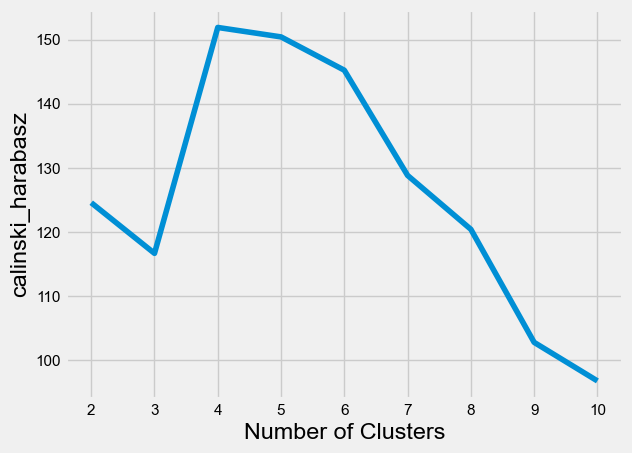

In [68]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5)
    kmedoids.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

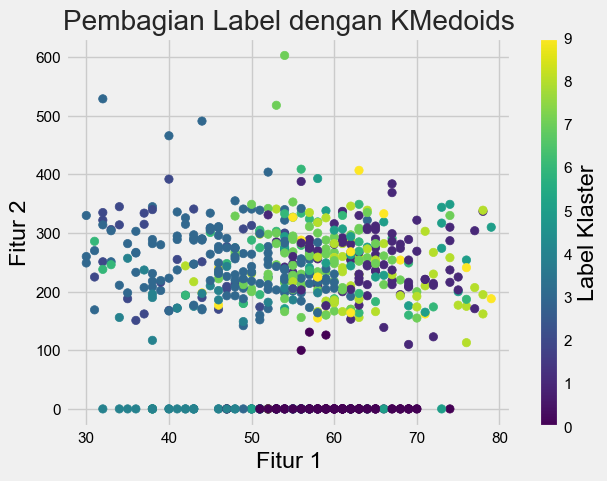

In [69]:
labels = kmedoids.labels_

# Visualisasi pembagian label
plt.scatter(df.iloc[:, 0], df.iloc[:, 3], c=labels, cmap='viridis')
plt.title('Pembagian Label dengan KMedoids')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.colorbar(label='Label Klaster')
plt.show()

In [70]:
max(calinski_harabaz)

151.88834616632474

In [71]:
# Nilai minimum dan maksimum dari indeks Calinski-Harabasz yang mungkin
min_possible_calinski_harabaz = 0  # Minimum umumnya 0
max_possible_calinski_harabaz = 1000  # Nilai maksimum yang mungkin tergantung pada data Anda

# Nilai maksimum indeks Calinski-Harabasz yang Anda temukan
max_calinski_harabaz = max(calinski_harabaz)  # calinski_harabaz adalah list/array dari nilai indeks Calinski-Harabaz

# Menghitung persentase relatif
percentage_calinski_harabaz = (max_calinski_harabaz / max_possible_calinski_harabaz) * 100

print("Persentase relatif dari nilai maksimum indeks Calinski-Harabaz: {:.2f}%".format(percentage_calinski_harabaz))


Persentase relatif dari nilai maksimum indeks Calinski-Harabaz: 15.19%


In [72]:
# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=2, init="random", random_state=5)
kmedoids.fit(df)

# Get cluster labels and cluster centers
labels = kmedoids.labels_
cluster_centers = kmedoids.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 56.    0.  130.    0.  122.    1.    1.    3. ]
 [ 55.    0.  136.  245.  131.    1.2   1.    4. ]]


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Definisikan fitur numerik dan kategorikal
numeric_features = ["Age","Sex","RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]
categorical_features = ["Oldpeak"]

# Buat pipelines untuk pemrosesan numerik dan kategorikal
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

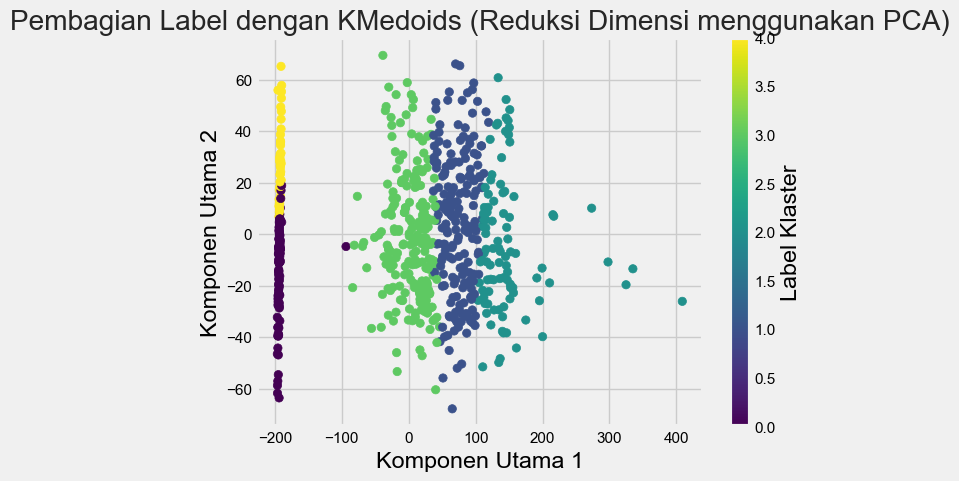

In [74]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

# Buat objek KMedoids
kmedoids = KMedoids(n_clusters=5, init="random", random_state=5)

# Melatih model pada data
kmedoids.fit(df)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)

# Dapatkan label klaster
labels = kmedoids.labels_

# Visualisasi pembagian label
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=labels, cmap='viridis')
plt.title('Pembagian Label dengan KMedoids (Reduksi Dimensi menggunakan PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Label Klaster')
plt.show()


In [75]:
#!pip install pywaffle

In [76]:
df['cluster'] = labels

In [77]:
df

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Cluster,cluster
0,49,1,160,180,156,1.00,1,1,3
1,70,0,137,155,181,0.20,1,2,3
2,56,1,164,334,198,2.30,1,1,2
3,78,0,148,195,107,4.20,1,0,3
4,70,0,120,200,154,0.10,1,2,3
...,...,...,...,...,...,...,...,...,...
654,57,1,140,241,123,0.20,1,4,1
655,45,0,110,264,132,1.20,1,2,1
656,68,0,144,193,141,3.40,1,0,3
657,57,0,130,131,115,1.20,1,3,3


In [78]:
#df.to_csv('clusterheart.csv', index=False)

In [79]:
Count =  df.groupby(["cluster"], as_index=False).count()[["cluster", "Age"]]
Count.columns = ["kmedoids Cluster Labels", "Count"]
Count

,kmedoids Cluster Labels,Count
0,0,106
1,1,196
2,2,97
3,3,213
4,4,47


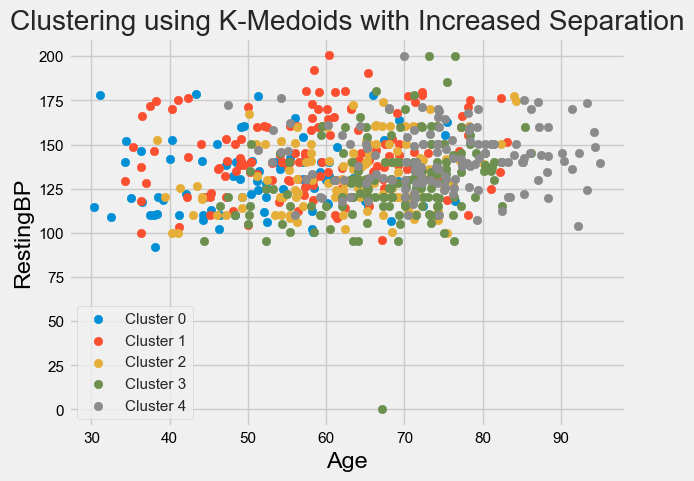

In [80]:
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import numpy as np

# Assuming df is your DataFrame

# Map the 'Sex' column to numeric values
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

# Use the appropriate columns as features for clustering
X = df[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']]

# Perform data preprocessing to handle missing values by imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now, proceed with KMedoids clustering
def find_clusters_kmedoids(X, n_clusters, rseed=0):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=rseed)
    labels = kmedoids.fit_predict(X)
    centers = kmedoids.cluster_centers_
    return centers, labels

centers_kmedoids, labels_kmedoids = find_clusters_kmedoids(X_imputed, 5, rseed=0)

# Plot clusters using scatter plot with KMedoids
for i in range(5):
    cluster_data = X[labels_kmedoids == i]
    noise = np.random.rand(len(cluster_data), 2) * 0.5  # Add some noise to scatter points
    plt.scatter(cluster_data['Age'] + 4*i + noise[:, 0], cluster_data['RestingBP'] + noise[:, 1], label=f'Cluster {i}', cmap='viridis')

plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Clustering using K-Medoids with Increased Separation')
plt.legend()
plt.show()


In [85]:
# Function to predict disease category based on restingBP range
def predict_disease_category(restingBP_range):
    # Define the rules for predicting disease category based on restingBP range
    if restingBP_range > 140:
        return 'Jantung Koroner'
    elif 110 <= restingBP_range < 120:
        return 'Endokarditis'
    elif 120 <= restingBP_range < 140:
        return 'Aritmia'
    elif 130 <= restingBP_range > 140:
        return 'Jantung Bawaan'
    elif restingBP_range >= 140:
        return 'Gagal Jantung'

# Predict disease category based on restingBP range for each cluster
predicted_categories = df['RestingBP'].apply(predict_disease_category)

# Display the predicted disease category for each cluster
for i, category in enumerate(predicted_categories.unique()):
    print(f"Cluster {i} predicted as: {category}")


Cluster 0 predicted as: Jantung Koroner
Cluster 1 predicted as: Aritmia
Cluster 2 predicted as: Endokarditis
Cluster 3 predicted as: Gagal Jantung
Cluster 4 predicted as: None


In [82]:
import pickle

In [83]:
filename = 'trained_model.sav'
pickle.dump(predict_disease_category, open(filename, 'wb'))

In [84]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))